# Statistical Testing

In [65]:
import seaborn as sns
import os
import sys
import csv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import sklearn
import pingouin as pg
from pingouin import kruskal
from collections import Counter 
pd.set_option('display.max_rows', None, 'display.max_columns', None, 'display.width', None)  # Show all rows
# pd.set_option('display.max_columns', None)  # Show all columns
# pd.set_option('display.width', None)  # Allow full width of display
import plotly.graph_objs as go
from matplotlib.dates import DateFormatter



In [27]:
sys.path

['/Users/emilyli/opt/anaconda3/lib/python39.zip',
 '/Users/emilyli/opt/anaconda3/lib/python3.9',
 '/Users/emilyli/opt/anaconda3/lib/python3.9/lib-dynload',
 '',
 '/Users/emilyli/eli_py39/lib/python3.9/site-packages']

In [5]:
os.chdir('/Users/emilyli/workspace/datasets/')

In [9]:
# import the data
df= pd.read_csv("Iris.csv")
df.columns = df.columns.str.lower()
df['sepal_width'] = df['sepalwidthcm']
# df[''] = df['petallengthcm']
# df[''] = df['petalwidthcm']
# df[''] = df['sepallengthcm']



setosa = df[(df['species'] == 'Iris-setosa')]
versicolor = df[(df['species'] == 'Iris-versicolor')]
virginica = df[(df['species'] == 'Iris-virginica')]



LeveneResult(statistic=0.6635459332943233, pvalue=0.4172859681296204)

In [11]:
df2= pd.read_csv("data_science_salaries.csv")

value_counts = df2['job_title'].value_counts()
filtered_counts = value_counts[value_counts >= 30]
filtered_counts
major_job_titles = filtered_counts.index.tolist()
# major_job_titles = [x.lower() for x in major_job_titles]
major_job_titles_df = df2[df2['job_title'].isin(major_job_titles)]

major_job_titles2 = [x for x in major_job_titles if 'scientist' in x.lower() or 'ml' in x.lower() or 'machine learning' in x.lower() ]
major_job_titles_df2 = df2[df2['job_title'].isin(major_job_titles2)]

,job_title,experience_level,employment_type,work_models,work_year,employee_residence,salary,salary_currency,salary_in_usd,company_location,company_size
0,Data Engineer,Mid-level,Full-time,Remote,2024,United States,148100,USD,148100,United States,Medium
1,Data Engineer,Mid-level,Full-time,Remote,2024,United States,98700,USD,98700,United States,Medium
2,Data Scientist,Senior-level,Full-time,Remote,2024,United States,140032,USD,140032,United States,Medium
3,Data Scientist,Senior-level,Full-time,Remote,2024,United States,100022,USD,100022,United States,Medium
4,BI Developer,Mid-level,Full-time,On-site,2024,United States,120000,USD,120000,United States,Medium


In [ ]:
# homogeneity of variance
# Homogeneity of variance test:
# Null hypothesis (H0): The variances of the groups are equal (homogeneity of variance).
# Alternative hypothesis (H1): The variances of the groups are not equal (heterogeneity of variance).

stats.levene(setosa['sepal_width'], versicolor['sepal_width'])


In [ ]:
# homoscedasticity test: levene test
# missing value are not supported, need either pandas.DataFrame.dropna() or pingouin.remove_na() functions.
pg.homoscedasticity(df2, dv="salary_in_usd", group="job_title")
pg.homoscedasticity(df2, dv="salary_in_usd", group="job_title", center= "mean")
pg.homoscedasticity(df2, method="bartlett", alpha=.05)


In [11]:
major_job_titles_df.head()

,job_title,experience_level,employment_type,work_models,work_year,employee_residence,salary,salary_currency,salary_in_usd,company_location,company_size
0,Data Engineer,Mid-level,Full-time,Remote,2024,United States,148100,USD,148100,United States,Medium
1,Data Engineer,Mid-level,Full-time,Remote,2024,United States,98700,USD,98700,United States,Medium
2,Data Scientist,Senior-level,Full-time,Remote,2024,United States,140032,USD,140032,United States,Medium
3,Data Scientist,Senior-level,Full-time,Remote,2024,United States,100022,USD,100022,United States,Medium
4,BI Developer,Mid-level,Full-time,On-site,2024,United States,120000,USD,120000,United States,Medium


In [12]:
df_num = df.select_dtypes(include=['number'])
df_num.corr()



,id,sepallengthcm,sepalwidthcm,petallengthcm,petalwidthcm,sepal_width
id,1.000000,0.716676,-0.397729,0.882747,0.899759,-0.397729
sepallengthcm,0.716676,1.000000,-0.109369,0.871754,0.817954,-0.109369
sepalwidthcm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544,1.000000
petallengthcm,0.882747,0.871754,-0.420516,1.000000,0.962757,-0.420516
petalwidthcm,0.899759,0.817954,-0.356544,0.962757,1.000000,-0.356544
sepal_width,-0.397729,-0.109369,1.000000,-0.420516,-0.356544,1.000000


In [44]:
# sns.pairplot(data=df, height = 1.5)



In [13]:
# homogeneity of variance
stats.levene(virginica['sepal_width'], versicolor['sepal_width'])


LeveneResult(statistic=0.08726625111308971, pvalue=0.7683067284841042)

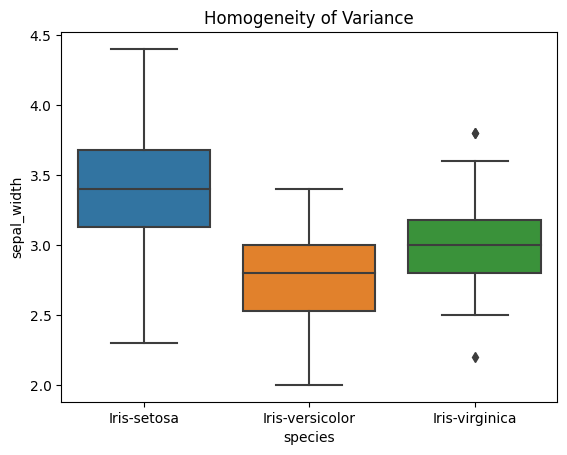

In [14]:
sns.boxplot(x='species', y='sepal_width', data=df)
plt.title('Homogeneity of Variance')
plt.show()


In [15]:
# Shapiro-Wilk test for normality

# Normality test:
# Null hypothesis (H0): The data follows a normal distribution.
# Alternative hypothesis (H1): The data does not follow a normal distribution.
# Shapiro-Wilk test, Kolmogorov-Smirnov test, or Anderson-Darling test are often used to assess whether the data significantly deviates 
# from a normal distribution. If the p-value from these tests is less than a chosen significance level (often denoted as α), the null hypothesis 
# of normality is rejected, indicating that there is evidence to suggest that the data does not follow a normal distribution.
stats.shapiro(setosa['sepal_width'])


ShapiroResult(statistic=0.9686915278434753, pvalue=0.20464898645877838)

In [16]:
stats.shapiro(versicolor['sepal_width'])

ShapiroResult(statistic=0.9741329550743103, pvalue=0.3379843533039093)

In [17]:
# independent t-test - parametric
stats.ttest_ind(setosa['sepal_width'], versicolor['sepal_width'])



Ttest_indResult(statistic=9.282772555558111, pvalue=4.362239016010214e-15)

In [18]:


# independent t-test - nonparametric
stats.wilcoxon(setosa['sepal_width'], versicolor['sepal_width'])


/Users/emilyli/eli_py39/lib/python3.9/site-packages/scipy/stats/_morestats.py:3414: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


WilcoxonResult(statistic=34.0, pvalue=3.0906620533922174e-08)

In [19]:
df2.head()

,job_title,experience_level,employment_type,work_models,work_year,employee_residence,salary,salary_currency,salary_in_usd,company_location,company_size
0,Data Engineer,Mid-level,Full-time,Remote,2024,United States,148100,USD,148100,United States,Medium
1,Data Engineer,Mid-level,Full-time,Remote,2024,United States,98700,USD,98700,United States,Medium
2,Data Scientist,Senior-level,Full-time,Remote,2024,United States,140032,USD,140032,United States,Medium
3,Data Scientist,Senior-level,Full-time,Remote,2024,United States,100022,USD,100022,United States,Medium
4,BI Developer,Mid-level,Full-time,On-site,2024,United States,120000,USD,120000,United States,Medium


In [37]:
# anova test
# Run the ANOVA
# homogeneity normality and independent assumptions
aov = pg.anova(data=df2, dv='salary_in_usd', between='experience_level', detailed=True)
print(aov)
result = df2.groupby('experience_level')['salary_in_usd'].describe().sort_values(by='mean', ascending=False)

median_salary = df2.groupby('experience_level')['salary_in_usd'].median()
median_salary
# Add median statistics to the sorted result DataFrame
result['median'] = median_salary
result

             Source            SS    DF            MS           F   
0  experience_level  4.903548e+12     3  1.634516e+12  380.809147  \
1            Within  2.830718e+13  6595  4.292218e+09         NaN   

           p-unc      np2  
0  4.075129e-228  0.14765  
1            NaN      NaN  


,count,mean,std,min,25%,50%,75%,max,median
experience_level,,,,,,,,,
Executive-level,254.0,189687.346457,71571.166828,15000.0,136000.0,184560.0,230000.0,465000.0,184560.0
Senior-level,4105.0,162071.063581,64444.875091,15809.0,118000.0,153600.0,199200.0,750000.0,153600.0
Mid-level,1675.0,119019.812537,71783.359309,15000.0,73523.0,106500.0,150000.0,750000.0,106500.0
Entry-level,565.0,84448.916814,48758.315152,15000.0,49646.0,75000.0,110000.0,350000.0,75000.0


In [41]:
# homogeneity normality and independent assumptions
# pairwise ttest
results = pg.pairwise_tests(data=df2, dv='salary_in_usd', between='experience_level')
stat_significant_threshold = 0.05
results['BF10'] = results['BF10'].astype(float)
# create new col for easy stat understanding
results['stat_significant'] = np.where(results['p-unc']<= stat_significant_threshold,1,0) 
results['test_favor'] = np.where(results['BF10']<= 1,'H1','H0') 
results['mean_higher'] = np.where(results['hedges'] > 0 ,'group_A','group_B') 

results[results['stat_significant'] == 1].sort_values(by = 'stat_significant', ascending = False)
# results.sort_values(by = 'stat_significant', ascending = False)


,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,BF10,hedges,stat_significant,test_favor,mean_higher
0,experience_level,Entry-level,Executive-level,False,True,-21.315910,362.508690,two-sided,6.236980e-66,4.892000e+76,-1.850745,1,H0,group_B
1,experience_level,Entry-level,Mid-level,False,True,-12.809247,1432.233962,two-sided,1.212519e-35,7.753000e+32,-0.517868,1,H0,group_B
2,experience_level,Entry-level,Senior-level,False,True,-33.976022,860.987453,two-sided,3.546610e-161,9.834000e+221,-1.236646,1,H0,group_B
3,experience_level,Executive-level,Mid-level,False,True,14.657850,334.895739,two-sided,6.270718e-38,4.661000e+42,0.984454,1,H0,group_A
4,experience_level,Executive-level,Senior-level,False,True,6.000877,278.978135,two-sided,6.080278e-09,3.450000e+06,0.425578,1,H0,group_A
5,experience_level,Mid-level,Senior-level,False,True,-21.292533,2831.225024,two-sided,1.936704e-93,1.154000e+93,-0.645806,1,H0,group_B


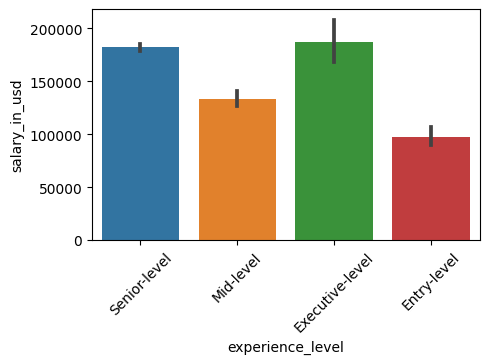

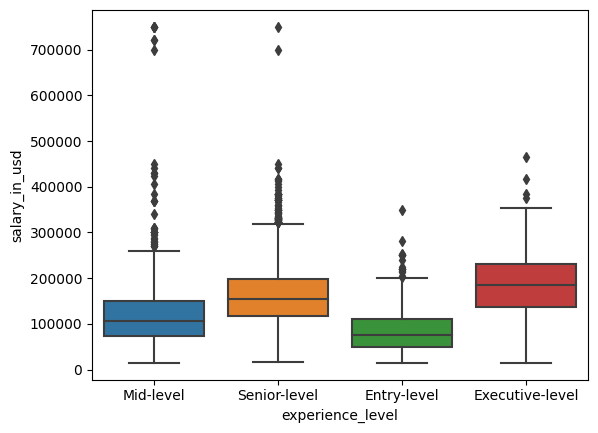

In [59]:
plt.figure( figsize = (5,3))

sns.barplot(x = major_job_titles_df2['experience_level'], y = major_job_titles_df2['salary_in_usd'])
plt.xticks(rotation=45)

plt.show()
sns.boxplot(x='experience_level', y='salary_in_usd', data=df2)
plt.show()

In [39]:
# Source: top = variation between, bottom = variation within
# SS: sum of squared deviations of group means from the overall mean.  top= SSB, bottom = SSW
# MS: SS/DF = MS, top=MSB, bottom= MSW
# F:F-Test, F statistics, MSB/MSW: null hypothesis (H0) that the means of the groups are equal. A higher F-value suggests that the difference between group means is more significant.
# p-unc; Uncorrected p-value, default at 0.05, H0: no group meean diff, Ha: otherwise
# np2: effect size, partial eta-squared, partial η²,  It represents the proportion of variance explained by the effect (in this case, the grouping variable) while taking into account the influence of 
    # other factors or covariates in the model.  typically range between 0 and 1, 
    # Small effect: η² around 0.01
    # Medium effect: η² around 0.06
    # Large effect: η² around 0.14
# 'eps': Greenhouse-Geisser epsilon factor (= index of sphericity)
# 'p-GG-corr': Greenhouse-Geisser corrected p-value
# 'W-spher': Sphericity test statistic
# 'p-spher': p-value of the sphericity test
# 'sphericity': sphericity of the data (boolean)
aov = pg.anova(data=major_job_titles_df, dv='salary_in_usd', between='job_title', detailed=True)
print(aov)

Counter(major_job_titles_df['job_title'])

      Source            SS    DF            MS          F          p-unc   
0  job_title  3.977610e+12    23  1.729396e+11  40.582783  2.241978e-168  \
1     Within  2.471187e+13  5799  4.261403e+09        NaN            NaN   

        np2  
0  0.138643  
1       NaN  


Counter({'Data Engineer': 1307,
         'Data Scientist': 1243,
         'Data Analyst': 910,
         'Machine Learning Engineer': 629,
         'Analytics Engineer': 246,
         'Research Scientist': 206,
         'Data Architect': 176,
         'Research Engineer': 136,
         'ML Engineer': 113,
         'Applied Scientist': 97,
         'Data Science Manager': 86,
         'Business Intelligence Analyst': 82,
         'Machine Learning Scientist': 73,
         'Business Intelligence Engineer': 69,
         'Data Manager': 63,
         'Research Analyst': 60,
         'Data Science': 56,
         'AI Engineer': 48,
         'Data Specialist': 47,
         'Data Science Consultant': 42,
         'BI Developer': 41,
         'Director of Data Science': 31,
         'Data Analytics Manager': 31,
         'Machine Learning Infrastructure Engineer': 31})

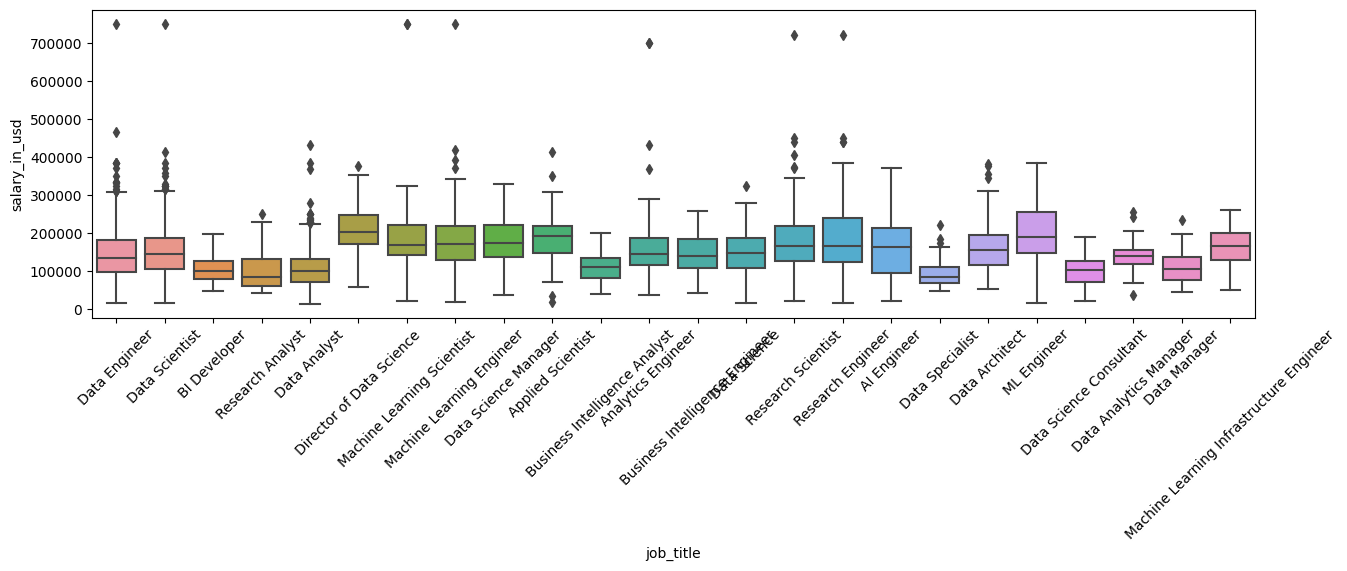

In [26]:
plt.figure(figsize=(15, 4)) 

sns.boxplot(x='job_title', y='salary_in_usd', data=major_job_titles_df)
plt.xticks(rotation=45)

plt.show()

In [24]:
# homogeneity normality and independent assumptions
aov = pg.anova(data=major_job_titles_df2, dv='salary_in_usd', between='job_title', detailed=True)
print(aov)

Counter(major_job_titles_df2['job_title'])

      Source            SS    DF            MS         F         p-unc   
0  job_title  7.064558e+11     6  1.177426e+11  23.26564  7.803177e-27  \
1     Within  1.206999e+13  2385  5.060794e+09       NaN           NaN   

        np2  
0  0.055294  
1       NaN  


Counter({'Data Scientist': 1243,
         'Machine Learning Engineer': 629,
         'Research Scientist': 206,
         'ML Engineer': 113,
         'Applied Scientist': 97,
         'Machine Learning Scientist': 73,
         'Machine Learning Infrastructure Engineer': 31})

In [42]:
# summary statistics of 1numerical + 1categorical
result = major_job_titles_df2.groupby('job_title')['salary_in_usd'].describe().sort_values(by='mean', ascending=False)
median_salary = df2.groupby('job_title')['salary_in_usd'].median()
median_salary
# Add median statistics to the sorted result DataFrame
result['median'] = median_salary
result

,count,mean,std,min,25%,50%,75%,max,median
job_title,,,,,,,,,
ML Engineer,113.0,198223.256637,79227.346718,15966.0,148000.0,189400.0,256000.0,385000.0,189400.0
Machine Learning Scientist,73.0,193710.438356,110030.732781,22800.0,142200.0,170000.0,222000.0,750000.0,170000.0
Applied Scientist,97.0,190687.711340,57793.195716,20000.0,149300.0,191475.0,220000.0,414000.0,191475.0
Research Scientist,206.0,180082.029126,82649.704531,23000.0,127975.0,165250.0,220000.0,720000.0,165250.0
Machine Learning Engineer,629.0,177226.448331,72770.418335,20000.0,129300.0,170730.0,220000.0,750000.0,170730.0
Machine Learning Infrastructure Engineer,31.0,162711.096774,54866.030007,50180.0,129850.0,165400.0,200460.0,260000.0,165400.0
Data Scientist,1243.0,149036.650845,65683.503427,16000.0,105000.0,144500.0,187457.5,750000.0,144500.0


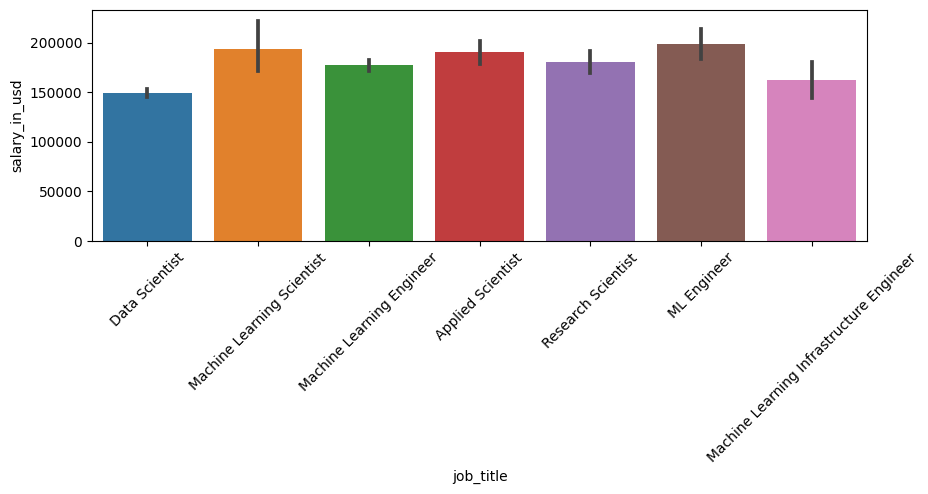

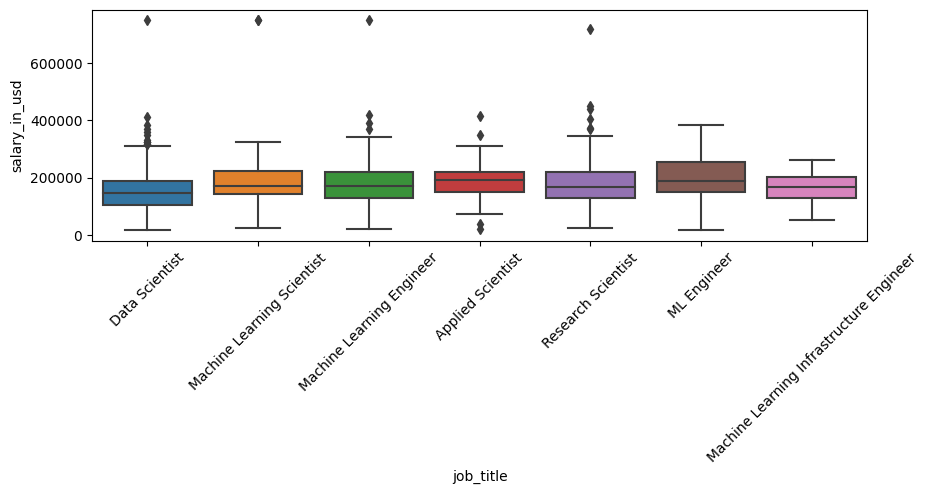

In [56]:
plt.figure( figsize = (10,3))

sns.barplot(x = major_job_titles_df2['job_title'], y = major_job_titles_df2['salary_in_usd'])
plt.xticks(rotation=45)

plt.show()

plt.figure( figsize = (10,3))

sns.boxplot(x='job_title', y='salary_in_usd', data=major_job_titles_df2)
plt.xticks(rotation=45)
# plt.yscale('log')

plt.show()


In [29]:
# homogeneity normality and independent assumptions
# pairwise ttest
# pairwise t-test to check which ones are stat significance after a significant anova
# pair : same subjects are measured under different conditions (true), False otherwise
# Parametric:Parametric tests assume that the data come from a normally distributed population with equal variances.
# 'p-unc' column: Contains the uncorrected p-value for the T-test.
# Hedges';  effect size estimate for the comparison. g, a measure of the standardized mean difference between the groups. Positive values indicate that the first group has higher means,
# Hedges: while negative values indicate that the second group has higher means
# BF10; Bayes Factor quantifies the evidence for the alternative hypothesis relative to the null hypothesis. Values greater than 1 indicate evidence for
# BF10; the alternative hypothesis, while values less than 1 indicate evidence for the null hypothesis..
# alternative: the test considers the possibility of differences in both directions. (two-sided)

results = pg.pairwise_tests(data=major_job_titles_df2, dv='salary_in_usd', between='job_title')
stat_significant_threshold = 0.05
results['BF10'] = results['BF10'].astype(float)
# create new col for easy stat understanding
results['stat_significant'] = np.where(results['p-unc']<= stat_significant_threshold,1,0) 
results['test_favor'] = np.where(results['BF10']<= 1,'H1','H0') 
results['mean_higher'] = np.where(results['hedges'] > 0 ,'group_A','group_B') 

results[results['stat_significant'] == 1].sort_values(by = 'stat_significant', ascending = False)
# results.sort_values(by = 'stat_significant', ascending = False)


,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,BF10,hedges,stat_significant,test_favor,mean_higher
0,job_title,Applied Scientist,Data Scientist,False,True,6.765206,116.237697,two-sided,5.677613e-10,3.588000e+08,0.638960,1,H0,group_A
2,job_title,Applied Scientist,Machine Learning Engineer,False,True,2.056353,147.336302,two-sided,4.151293e-02,9.110000e-01,0.189488,1,H1,group_A
3,job_title,Applied Scientist,Machine Learning Infrastructure Engineer,False,True,2.439311,52.966813,two-sided,1.809833e-02,2.918000e+00,0.486952,1,H0,group_A
6,job_title,Data Scientist,ML Engineer,False,True,-6.402502,126.389224,two-sided,2.730955e-09,3.721000e+07,-0.734732,1,H0,group_B
7,job_title,Data Scientist,Machine Learning Engineer,False,True,-8.175295,1153.424238,two-sided,7.710703e-16,7.741000e+12,-0.413503,1,H0,group_B
9,job_title,Data Scientist,Machine Learning Scientist,False,True,-3.433227,75.043322,two-sided,9.740145e-04,3.590300e+01,-0.648419,1,H0,group_B
10,job_title,Data Scientist,Research Scientist,False,True,-5.129474,249.709500,two-sided,5.835169e-07,3.029000e+04,-0.454018,1,H0,group_B
11,job_title,ML Engineer,Machine Learning Engineer,False,True,2.625270,147.916406,two-sided,9.567766e-03,3.098000e+00,0.284283,1,H0,group_A
12,job_title,ML Engineer,Machine Learning Infrastructure Engineer,False,True,2.874237,68.164609,two-sided,5.397250e-03,7.929000e+00,0.472597,1,H0,group_A


In [51]:
# homogeneity normality and NONE-independent assumptions (cannot assume independent)
# none-independent anova /One-way repeated-measures 
# between vs. within arg
# within arg: factor that compute group mean from
# subject: the col contains info which subject were done the repeat measureed from , eg: patientId, etc.
rm_aov = pg.rm_anova(data=major_job_titles_df2, dv='salary_in_usd', within='Disgustingness',  subject='Subject', detailed=True)
rm_aov



TypeError: rm_anova() got an unexpected keyword argument 'between'

In [97]:
# homogeneity normality and NONE-independent assumptions (cannot assume independent)
# none-independent anova / two-way repeated-measures = two factors
aov = pg.rm_anova(dv='DesireToKill', within=['Disgustingness', 'Frighteningness'],
                  subject='Subject', data=df)


0     3.588000e+08
1     2.030000e-01
2     9.110000e-01
3     2.918000e+00
4     1.710000e-01
5     2.970000e-01
6     3.721000e+07
7     7.741000e+12
8     4.480000e-01
9     3.590300e+01
10    3.029000e+04
11    3.098000e+00
12    7.929000e+00
13    1.700000e-01
14    7.510000e-01
15    4.810000e-01
16    2.840000e-01
17    9.800000e-02
18    1.098000e+00
19    5.730000e-01
20    2.300000e-01
Name: BF10, dtype: float64

In [68]:
# homoscedasticity test: levene test
# missing value are not supported, need either pandas.DataFrame.dropna() or pingouin.remove_na() functions.
pg.homoscedasticity(df2, dv="salary_in_usd", group="job_title")
# pg.homoscedasticity(df2, dv="salary_in_usd", group="job_title", center= "mean")
# pg.homoscedasticity(df2, method="bartlett", alpha=.05)



,W,pval,equal_var
levene,2.775019,7.365424e-23,False


In [69]:
# homogeneity normality and independent assumptions
# 1-way anova
pg.anova(dv='Pain threshold', between='Hair color', data=df, detailed=True)
# 2-way anova
pg.anova(dv="Yield", between=["Blend", "Crop"],  data=df)
# 2-way annova with unbalanced design (requires statsmodels)
pg.anova(dv="Scores", between=["Diet", "Exercise"], effsize="n2")
# 3-way anova 
pg.anova(dv='Cholesterol', between=['Sex', 'Risk', 'Drug'],ss_type=3)
# One-way and two-way repeated measures ANOVA, rm = repeat-measured
pg.rm_anova(dv='DesireToKill', within='Disgustingness',
                  subject='Subject', data=df, detailed=True, effsize="np2")

# two-way repeated measures anova, 
pg.rm_anova(dv='DesireToKill', within=['Disgustingness', 'Frighteningness'],
                  subject='Subject', data=df, detailed=True,)

 # the between-subject groups are unbalanced (= unequal sample sizes), a type II ANOVA will be computed.
# when you have both within-subjects and between-subjects factors:# or When you want to assess interaction effects
# When you want to control for subject-specific variability
pg.mixed_anova(dv='Scores', between='Group', within='Time', subject='Subject', data=df)
# none-homogeneity (unequal variance), normality and independent assumptions
pg.welch_anova(dv='Pain threshold', between='Hair color', data=df)


KeyError: 'Pain threshold'

# None-Parameric Test

In [66]:
# Kruskal-Wallis H-test: non-parametric test for independent groups statistically differences:
# (H0): The distributions of all groups are equal.s (H1): At least one of the groups has a different distribution.
kruskal(data=major_job_titles_df2, dv='salary_in_usd', between='job_title')




,Source,ddof1,H,p-unc
Kruskal,job_title,6,138.238659,2.358253e-27
